<a href="https://colab.research.google.com/github/williamokomba/Multiviate-_Analysis-Reduction-_Technique-/blob/main/Multiviate__Analysis_Reduction__Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multivariate Analysis - Reduction Technique**





## **1.0 Defining the Question**

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.


**Dataset provided**

* cancer dataset : [link](https://www.kaggle.com/yasserh/breast-cancer-dataset)

**Dataset Columns:**

1.   id- ID number
2.   diagnosis-  (M = malignant, B = benign)
3.  adius_mean- Radius of Lobes
4.  exture_mean- Mean of Surface Texture
5. perimeter_mean- Outer Perimeter of Lobes
6. area_mean- Mean Area of Lobes
7. smoothness_mean- Mean of Smoothness Levels
8. compactness_mean-Mean of Compactness
9. concavity_mean-Mean of Concavity
10. concave points_mean- Mean of Cocave Points
11. symmetry_mean- Mean of Symmetry
12. fractal_dimension_mean- Mean of Fractal Dimension
13. radius_se- SE of Radius
14. texture_se- SE of Texture
15. perimeter_se-Perimeter of SE
16. area_se- Are of SE
17. smoothness_se-SE of Smoothness
18. compactness_se- SE of compactness
19. concavity_se- SEE of concavity
20. concave points_se-SE of concave points
21. symmetry_se- SE of symmetry
22. fractal_dimension_se-SE of Fractal Dimension
23. radius_worst- Worst Radius
24. texture_worst-Worst Texture
25. perimeter_worst- Worst Permimeter
26. area_worst-Worst Area
27. smoothness_worst- Worst Smoothness
28. compactness_worst- Worse Compactnes
29. concavity_worst-Worst Concavity
30. concave points_worst- Worst Concave Points
31. symmetry_worst- Worst Symmetry
32. fractal_dimension_worst-Worst Fractal Dimension


**More insight features are computed for each cell nucleus:**

*   **radius** (mean of distances from center to points on the perimeter)
*  **texture** (standard deviation of gray-scale values)
*   perimeter
*   area
*   smoothness (local variation in radius lengths)
*   compactness (perimeter² / area — 1.0)
*   concavity (severity of concave portions of the contour)
*   concave points (number of concave portions of the contour)
*   symmetry
*  fractal dimension (“coastline approximation” — 1)

The mean, standard error, and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.










###**1.1 Specifying the data analytic question (Objective)**

To figure out how to predict the elements that are likely to cause Breast cancer.

###**1.2 Defining the metric for success**

Indenify the features that have a high chance of correctly predicting breast cancer patient.

###**1.3 Understanding the Context**

Hospitals carry out breast cancer screening to determine whether it is cancerous or not cancerous. the target population is the women.

1.4 Recording the Experimental Design
*  load libraries and dataset
*  clean dataset:
*  deal with duplicate and/or missing values
*  deal with outliers, where necessary
*  deal with other anomalies in the data, where necessary
*  carry out exploratory data analysisx

   a. Univariate analysis

   b. Bivariate analysis

   c. Multivariate analysis

*  conclusion and recommendations

###**1.5 Assessing the Relevance of the Data**

This dataset is relevant since the testing was carried out in the hospital enviroment as suggested by the test results.

## **2.Loading and reading Our Datasets**

In [ ]:
# Importing standard libraries
#
# load pandas
import pandas as pd               # library for data manipulation and analysis
#
# load numpy
import numpy as np                # library for performin scientific computations
#
# load matplotlib.pyplot
import matplotlib.pyplot as plt   # library for creating basic visualisations
#
# load Seaborn
import seaborn as sns             # library for creating rich data visualisation
#
%matplotlib inline


In [ ]:
#loadinga and reading the dataset
#
cancerDf= pd.read_csv("/content/breast-cancer.csv", index_col=None)
#
#checking the sample of the dataset
cancerDf.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
289,89143601,B,11.370,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,0.2656,1.9740,1.954,17.490,0.006538,0.01395,0.01376,0.009924,0.03416,0.002928,12.360,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.01646,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.1297,0.13570,0.06880,0.02564,0.3105,0.07409
423,906878,B,13.660,19.13,89.46,575.3,0.09057,0.11470,0.09657,0.048120,0.1848,0.06181,0.2244,0.8950,1.804,19.360,0.003980,0.02809,0.03669,0.012740,0.01581,0.003956,15.140,25.50,101.40,708.8,0.1147,0.31670,0.36600,0.14070,0.2744,0.08839


## **3. Checking the Data**

In [ ]:
# Determining the no. of records in our health dataset
#
print("BreastCancer dataset has {} records".format(cancerDf.shape[0]))
print("BreastCancer dataset has {} features/Variables".format(cancerDf.shape[1]))

BreastCancer dataset has 569 records
BreastCancer dataset has 32 features/Variables


In [ ]:
# Previewing the top rows of our Breastcancer dataset
cancerDf.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Previewing the last rows of our Breastcancer dataset
cancerDf.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


**observation** the breastcancer dataset is uniform from top to the bottom.

In [ ]:
# Checking on whether each column of result dataset has an appropriate datatype
#
cancerDf.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

**Observation:** diangnosis variable is object, we will transform it to categorical datatype during data cleaning.

In [ ]:
#concise information about dataset
cancerDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Observation: 

1. All variables has 569 recored. this is a hind that there is no null values.
2. the dataset contains 30 float data type  variable, 1 int data type variable, and 1 object data type variable.



In [102]:
# Checking for unique values in all columns in the dataset
#for uni in cancerDf.columns:
 # print(cancerDf[uni].sort_values(ascending = True).unique())

**observation:** 
We are able to single out unique features for each colunms/variable, there is no unusual values.

note: did not run this code since the output is taking alot of the space

In [ ]:
#checking the columns
cancerDf.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**Observation:** columns has no spelling issues.

In [ ]:
#consice summary statistics of the datset
cancerDf.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#Changing diagnosis variable to categorical datatype
cancerDf['diagnosis']=cancerDf['diagnosis'].astype('category')
#
#Confirming the changes
cancerDf["diagnosis"].dtypes

CategoricalDtype(categories=['B', 'M'], ordered=False)

In [ ]:
cancerDf.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Observation**

redius mean has a mean of 14.12, std of 3.5, and a maximum  value of 28.11

this give us a precise statistics about variables.



## **4. External Data Source Validation**

### **a. Validation**

In [ ]:
#checking a variable that relates to 
cancerDf.diagnosis.unique()

['M', 'B']
Categories (2, object): ['M', 'B']

Observation: M = malignant, B = benign, malignant means cancerous, and benign means not harmful. this is a true reflection of the breast cancer tests.

## **5. Tidying the Dataset**

In [ ]:
#making a copy to be used for data cleaning.
#
cancerDf1=cancerDf.copy(deep=True);
#
#preview of the copy dataset
#
cancerDf1.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
#converting diagnosis variable to correct datatype- categorical
cancerDf1['diagnosis']=cancerDf1['diagnosis'].astype('category')
#
#confirming the changes
cancerDf1["diagnosis"].dtypes

CategoricalDtype(categories=['B', 'M'], ordered=False)

The missing value is : 0


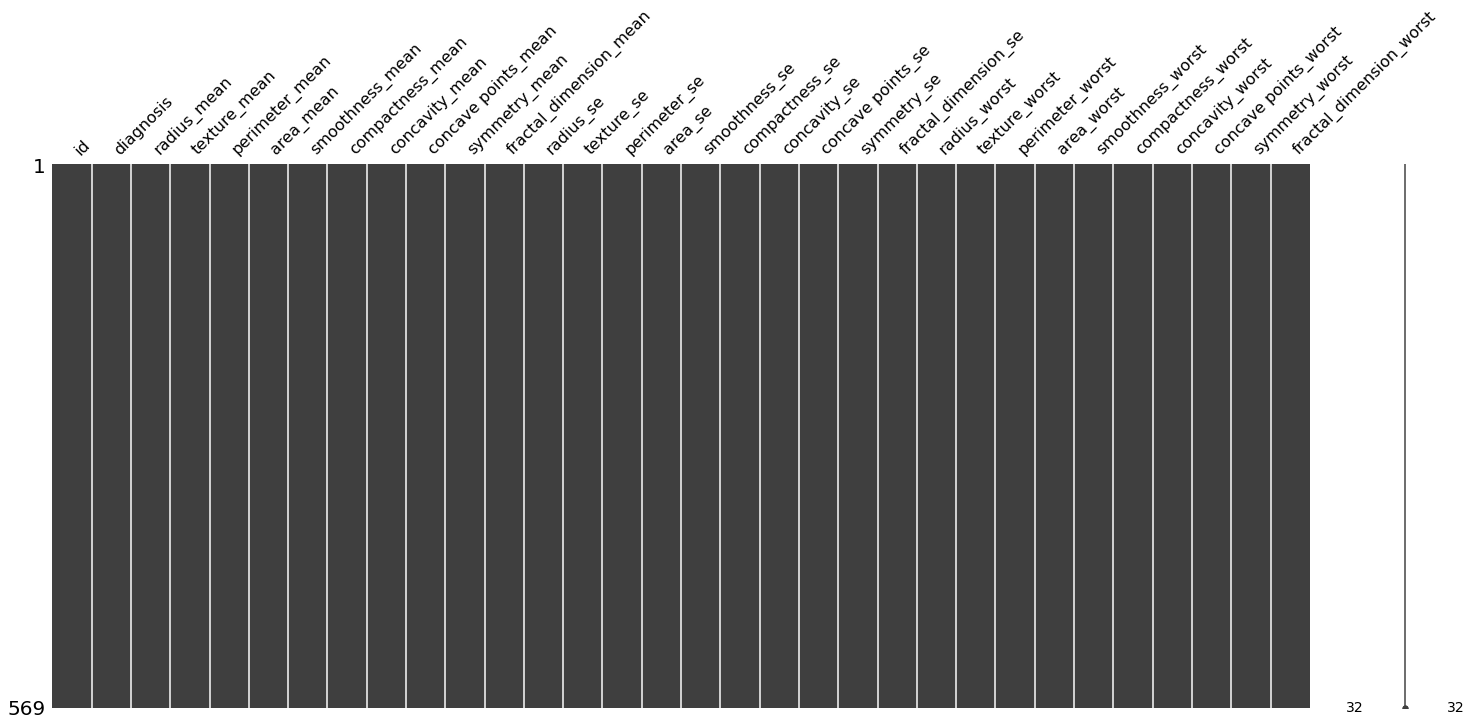

In [ ]:
#checking for the null values
print("The missing value is : {}".format(cancerDf1.isnull().sum().sum()))

#checking mising values using visualization
#
#!pip install missingno
import missingno as an
#
#Alternative way to detect missing values
import missingno as an
an.matrix(cancerDf1)
plt.show()

**observation**: there is no null values

In [ ]:
#checking for duplicates
cancerDf1.duplicated().any()

False

Observation: there is no duplicates.

In [ ]:
#dropping unnessary column
cancerDf1 = cancerDf1.drop(['id'],axis=1)

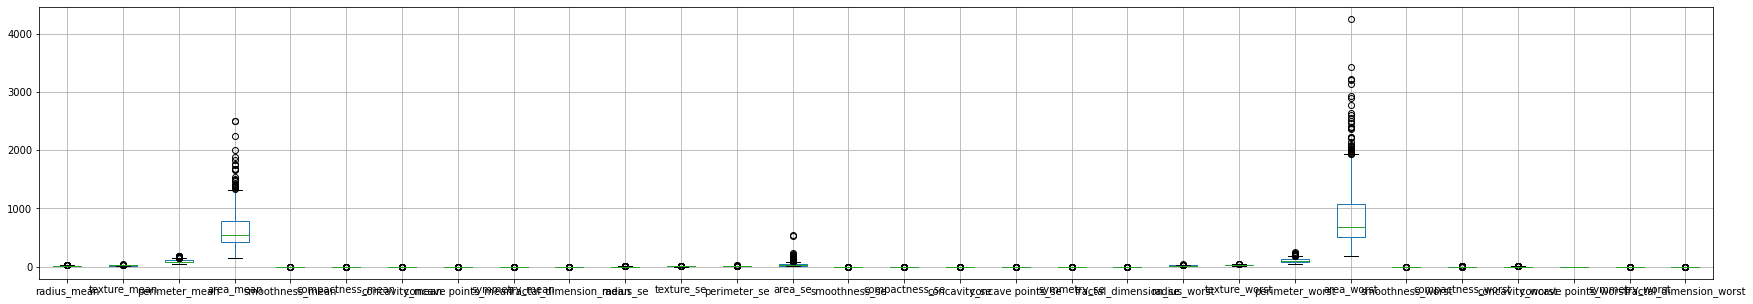

In [ ]:
# Checking for Outliers
#
plt.figure(figsize = (30, 5))
cancerDf1.boxplot()
plt.show()

**Observation:** most of the variables have outliers. i will try to check a few variables.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Radious_mean boxplot')

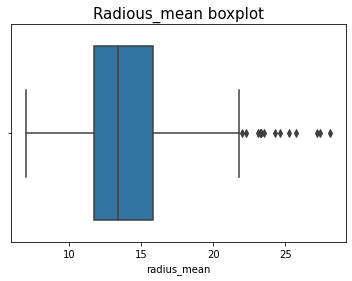

In [ ]:
#checking the radius_mean outlier
sns.boxplot(cancerDf1['radius_mean'])
plt.title("Radious_mean boxplot", fontsize=15)

observation: there is alot of outliers

In [ ]:
#Removing outliers
#
#making a copy to work on
cancerDf2= cancerDf1.copy()

In [ ]:
# removing outliers using IQR method
for i in [i for i in cancerDf2.columns]:
    if cancerDf2[i].nunique()>=12:
        Q1 = cancerDf2[i].quantile(0.15)
        Q3 = cancerDf2[i].quantile(0.85)
        IQR = Q3 - Q1
        cancerDf2 = cancerDf2[cancerDf2[i] <= (Q3+(1.5*IQR))]
        cancerDf2 = cancerDf2[cancerDf2[i] >= (Q1-(1.5*IQR))]
cancerDf2 = cancerDf2.reset_index(drop=True)

#checking the records
print ("Dataset before outlier removal has {} records".format(cancerDf1.shape[0]))
print ("Dataset after outlier removal has {} records".format(cancerDf2.shape[0]))

Dataset before outlier removal has 569 records
Dataset after outlier removal has 502 records


In [ ]:
# standardizing variable names for readability
#
cancerDf2.columns = cancerDf2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#
#saving clean dataset
cancerDf2.to_csv("cancerDf2.csv")

## **6. Exploratory Data Analysis**

## 6.1. Univariate analysis

We will now perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables

In [ ]:
#Checking the central tedency of the numerical variables

numCol= ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

for column in numCol:
  print("\n")
  print(column + "standard deviation: " + str(cancerDf2[column].std()))
  print(column + "variance: " + str(cancerDf2[column].var()))
  print(column + "kurtosis: " + str(cancerDf2[column].kurt()))
  print(column + "mean: " + str(cancerDf2[column].mean()))



radius_meanstandard deviation: 3.1032958653949057
radius_meanvariance: 9.630445228177116
radius_meankurtosis: 0.19915376712605415
radius_meanmean: 13.856085657370524


texture_meanstandard deviation: 4.148723147840234
texture_meanvariance: 17.21190375742538
texture_meankurtosis: 0.28633403503674515
texture_meanmean: 19.034422310756977


perimeter_meanstandard deviation: 21.254272277810966
perimeter_meanvariance: 451.74409005932375
perimeter_meankurtosis: 0.27455726605348696
perimeter_meanmean: 89.86567729083669


area_meanstandard deviation: 292.92351099129087
area_meanvariance: 85804.18329146491
area_meankurtosis: 1.1379484709530998
area_meanmean: 622.2986055776895


smoothness_meanstandard deviation: 0.013059414240377968
smoothness_meanvariance: 0.00017054830030178685
smoothness_meankurtosis: -0.11286550299066356
smoothness_meanmean: 0.09509276892430268


compactness_meanstandard deviation: 0.0430331800524382
compactness_meanvariance: 0.001851854585425565
compactness_meankurtosis: 

**observation:** the above is the central tedency statistics.

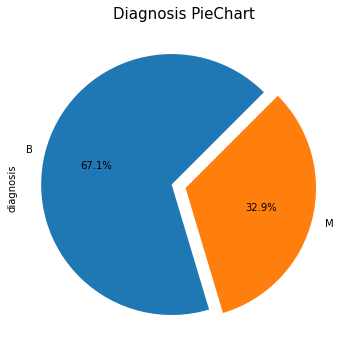

In [ ]:
# univariate analysis-diagnosis variable
explode= [0.1,0.01]
plt.figure(figsize = (6, 6))
cancerDf2.diagnosis.value_counts().plot(kind = 'pie', explode=explode, autopct = '%0.1f%%', startangle=45)
plt.title("Diagnosis PieChart", fontsize=15)
plt.show()

Observation: 
1. Most of the patients who were tested did not have breast cancer.
2. This is a target variable and it shows class inbalance. in case of machine modeling then we can remove imbalance through smote or oversampling the minority group.

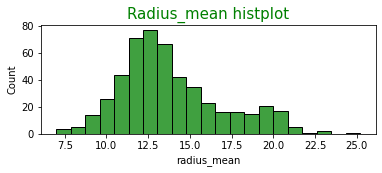

In [ ]:
#checking 
plt.figure(figsize=(6,2))
sns.histplot(cancerDf2["radius_mean"], color= "g")
plt.title("Radius_mean histplot", fontsize=15, color="g");

Observation: Most of the tumors lies betweenin size range of between  11 to 13 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


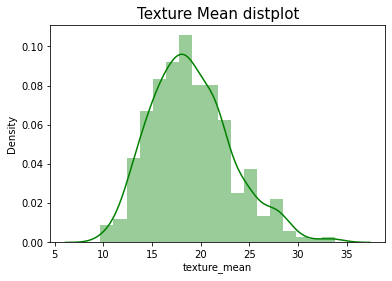

In [ ]:
#univariate analysis- texture variable
plt.figure(figsize = (6, 4))
sns.distplot(cancerDf2.texture_mean, color= "g")
plt.title("Texture Mean distplot", fontsize=15);

observation: this is a normal distribution. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


kurtosis is : 0.30618969963857756


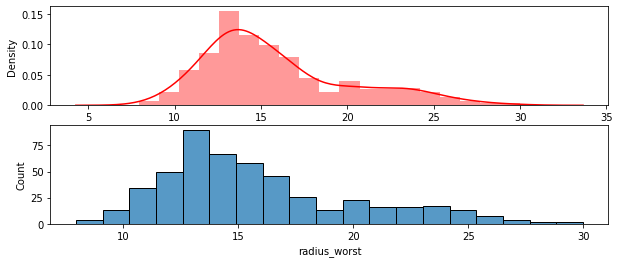

In [ ]:
#univariate analysis radious worst 
f,axes= plt.subplots(2,1,figsize=[10,4])
sns.distplot(cancerDf2['radius_worst'], ax=axes[0], color= "r")
sns.histplot(cancerDf2['radius_worst'], ax=axes[1]);
print("kurtosis is : {}". format(cancerDf2['radius_worst'].kurt()))

observation: this is a normal distribution, and tumor concentration is between 12 to 15

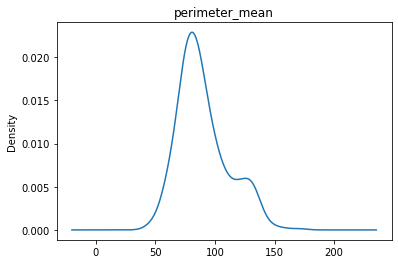

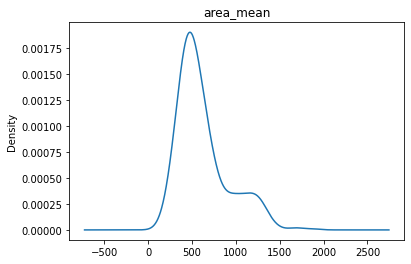

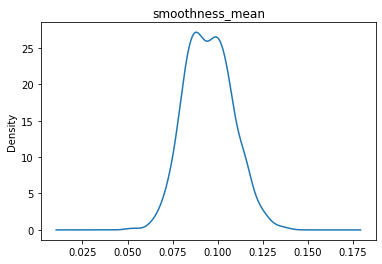

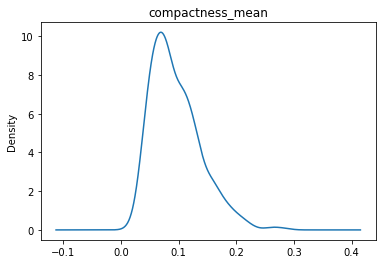

In [ ]:
#getting more variable distributions
for i in ('perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean'):
  plt.figure()
  cancerDf2[i].plot.kde(title=i)

**observation**: most of this variables are symetric. 

### 6b. Bivariate analysis

We now perform bivariate analysis, which is a type of analysis that involves two variables. The main objective is to understand the relationships between these two types of variables

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

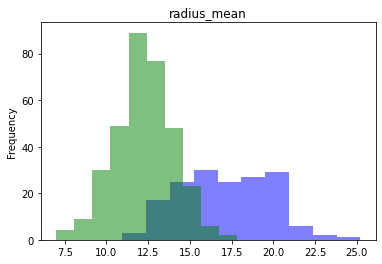

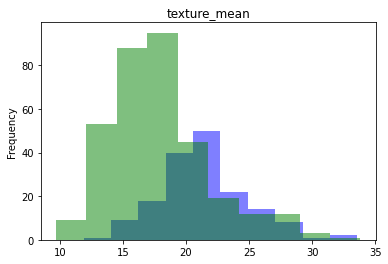

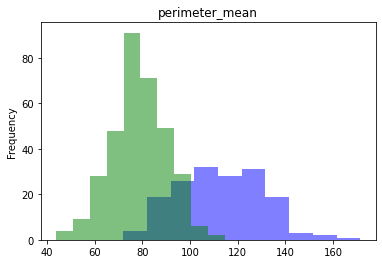

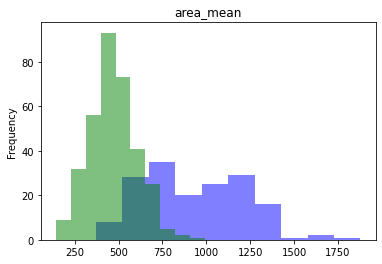

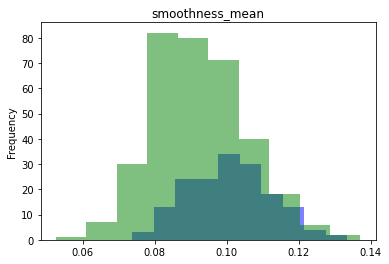

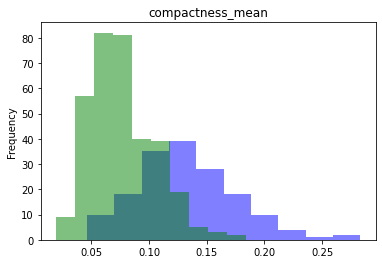

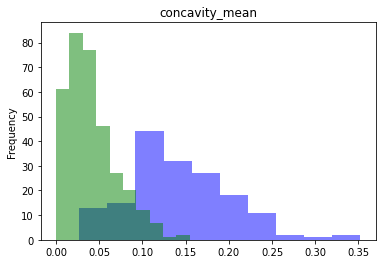

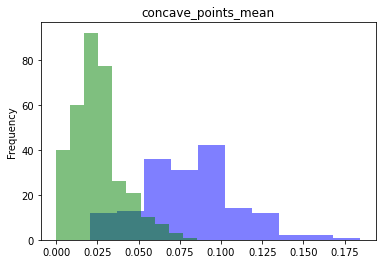

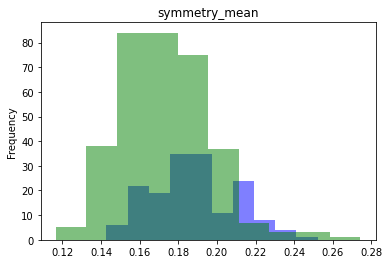

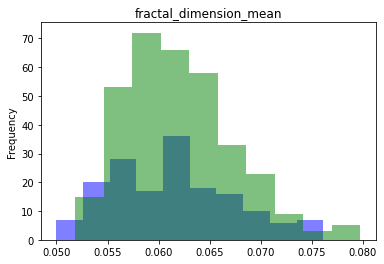

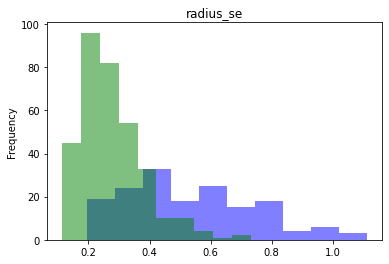

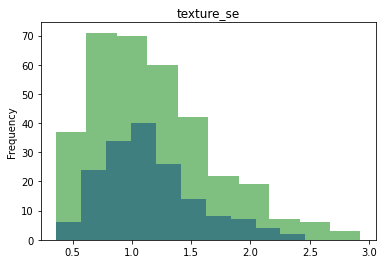

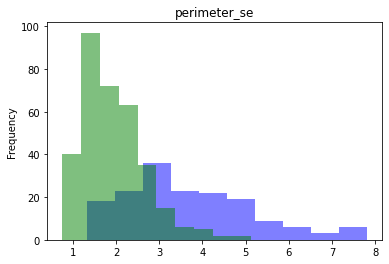

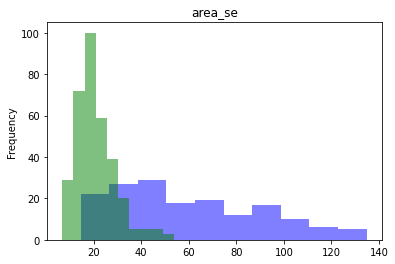

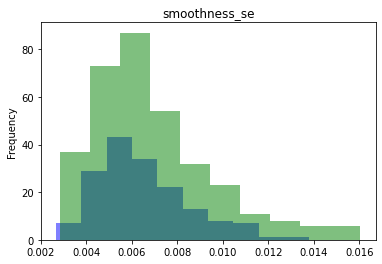

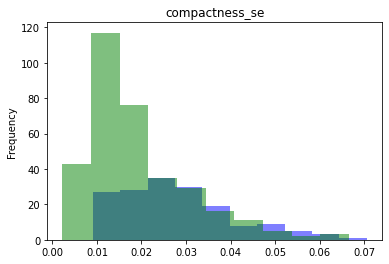

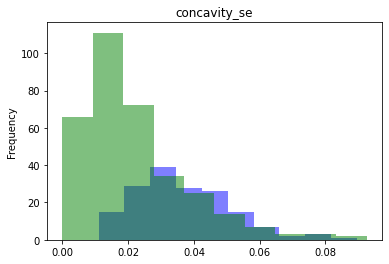

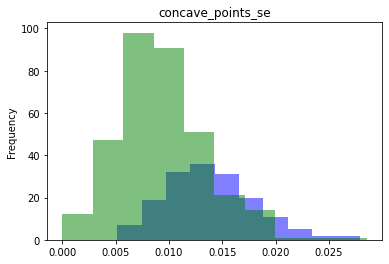

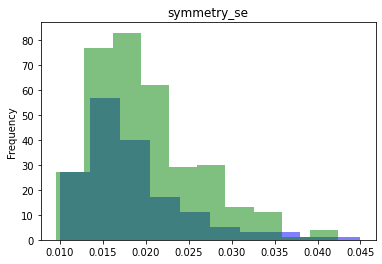

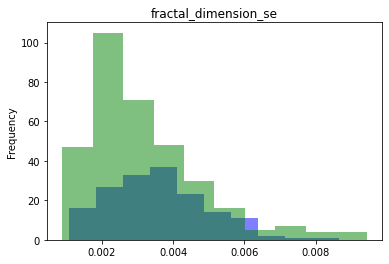

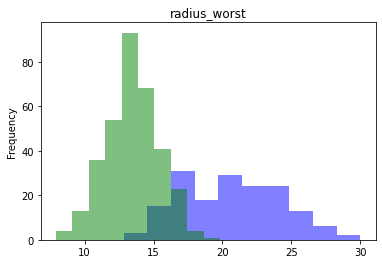

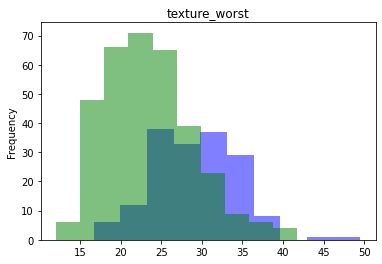

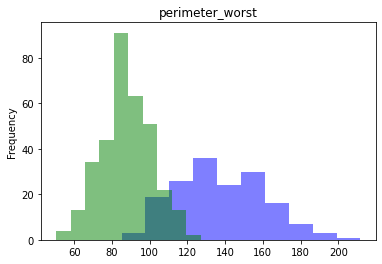

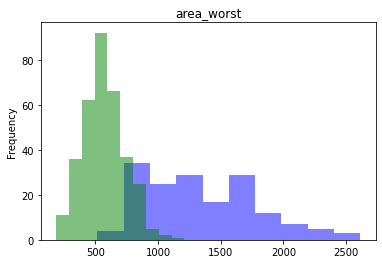

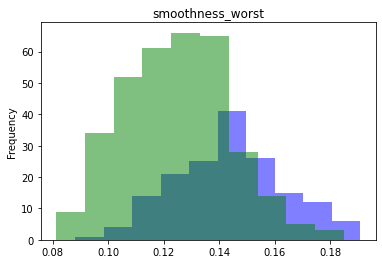

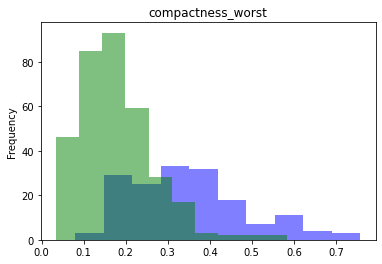

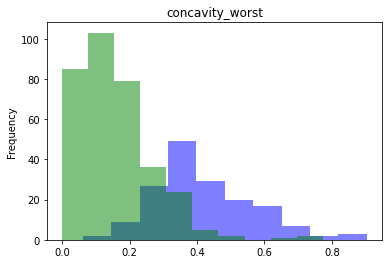

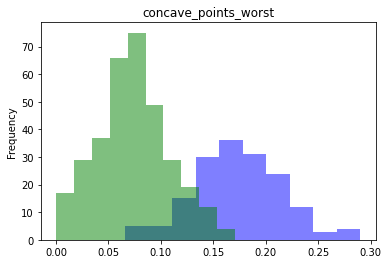

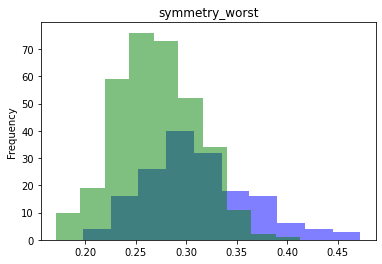

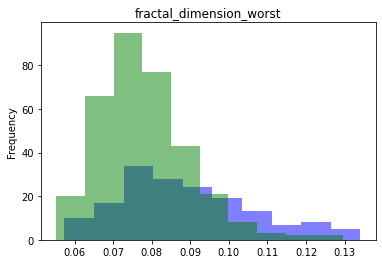

In [ ]:
numCols= ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for i in numCols:
  plt.figure()
  cancerDf2[i][cancerDf2["diagnosis"]== "M"]. plot.hist(alpha=0.5, color="b", title=i)
  cancerDf2[i][cancerDf2["diagnosis"]== "B"]. plot.hist(alpha=0.5, color="g", title=i)

**observation**: Bengin is higher in all the variables compared to malignan

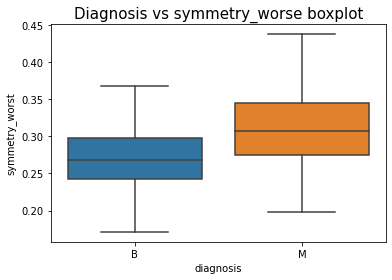

In [ ]:
#bivariate analysis checking interquartile range
sns.boxplot(x=cancerDf2['diagnosis'], y=cancerDf2['symmetry_worst'], showfliers=False)
plt.title("Diagnosis vs symmetry_worse boxplot", fontsize = 15);


observation: interquartile range for malignant is higher compared to benign

We will transform the diagnosis datatype from categorical to numerical datatype in order to carry out correlation 

In [ ]:
#changing str to numerical values. M=1 - Malignant(cancerous), B=0 - Benign(not cancerous)
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
cancerDf2['diagnosis']=le.fit_transform(cancerDf2['diagnosis'])
cancerDf2["diagnosis"].unique()

array([1, 0])

In [ ]:
#checking correlation coefficeints
corr =cancerDf2.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.741626,0.397115,0.754663,0.744511,0.312203,0.610922,0.753562,0.791057,0.295507,-0.054985,0.628404,-0.026809,0.626915,0.704646,-0.085017,0.335663,0.407108,0.462057,-0.129513,0.124803,0.795559,0.440878,0.803785,0.782120,0.414951,0.601454,0.696082,0.786695,0.403114,0.344823
radius_mean,0.741626,1.000000,0.294647,0.998267,0.991787,0.127751,0.548294,0.725310,0.821066,0.129022,-0.351927,0.650149,-0.142390,0.651557,0.797284,-0.303373,0.278641,0.364631,0.467466,-0.238306,-0.005739,0.971792,0.287339,0.968039,0.950050,0.127136,0.487470,0.610937,0.765583,0.195847,0.083261
texture_mean,0.397115,0.294647,1.000000,0.301664,0.305257,-0.032954,0.247198,0.320767,0.280050,0.072297,-0.067988,0.310672,0.419713,0.325221,0.324402,0.041151,0.239832,0.249500,0.183171,-0.003648,0.114500,0.331826,0.918832,0.340773,0.337369,0.099018,0.281788,0.308572,0.277992,0.116271,0.141455
perimeter_mean,0.754663,0.998267,0.301664,1.000000,0.990584,0.161723,0.592856,0.759213,0.846461,0.155723,-0.309604,0.658352,-0.137957,0.665662,0.802835,-0.287109,0.317537,0.397650,0.491669,-0.229444,0.028855,0.972535,0.294542,0.973129,0.951028,0.158544,0.526424,0.643884,0.790058,0.215640,0.123606
area_mean,0.744511,0.991787,0.305257,0.990584,1.000000,0.127517,0.541300,0.730919,0.825010,0.135786,-0.331986,0.682314,-0.114802,0.682030,0.827827,-0.257720,0.279343,0.366931,0.461993,-0.211099,0.011416,0.970912,0.294239,0.966972,0.964812,0.136381,0.472432,0.602541,0.754882,0.190734,0.084443
smoothness_mean,0.312203,0.127751,-0.032954,0.161723,0.127517,1.000000,0.638189,0.478722,0.516927,0.527309,0.603549,0.278772,0.080221,0.268097,0.233464,0.343840,0.281594,0.259223,0.397997,0.104974,0.322019,0.175498,0.019415,0.195341,0.172091,0.798801,0.419030,0.385686,0.455525,0.348263,0.477933
compactness_mean,0.610922,0.548294,0.247198,0.592856,0.541300,0.638189,1.000000,0.880240,0.838710,0.507285,0.467678,0.499504,-0.035359,0.558027,0.535590,0.062690,0.739453,0.673503,0.646100,-0.010659,0.527377,0.579615,0.252914,0.627035,0.562141,0.581289,0.878633,0.821391,0.819379,0.454284,0.685328
concavity_mean,0.753562,0.725310,0.320767,0.759213,0.730919,0.478722,0.880240,1.000000,0.938200,0.394628,0.201396,0.607116,0.000371,0.649956,0.680315,0.006198,0.646929,0.741035,0.660010,-0.072009,0.398834,0.742696,0.334023,0.778544,0.733548,0.483267,0.788829,0.906009,0.879216,0.370903,0.518560
concave_points_mean,0.791057,0.821066,0.280050,0.846461,0.825010,0.516927,0.838710,0.938200,1.000000,0.395505,0.097318,0.689573,-0.028641,0.711821,0.769315,-0.031124,0.509691,0.567182,0.674719,-0.087707,0.274264,0.834508,0.293386,0.856419,0.823237,0.468981,0.699151,0.789730,0.915148,0.359851,0.399107
symmetry_mean,0.295507,0.129022,0.072297,0.155723,0.135786,0.527309,0.507285,0.394628,0.395505,1.000000,0.387117,0.307497,0.105158,0.308730,0.251329,0.208078,0.327968,0.247776,0.305599,0.351936,0.298632,0.161365,0.072700,0.181606,0.160646,0.394635,0.375092,0.316553,0.336572,0.671533,0.355598


the above can be represented in the heatmap.

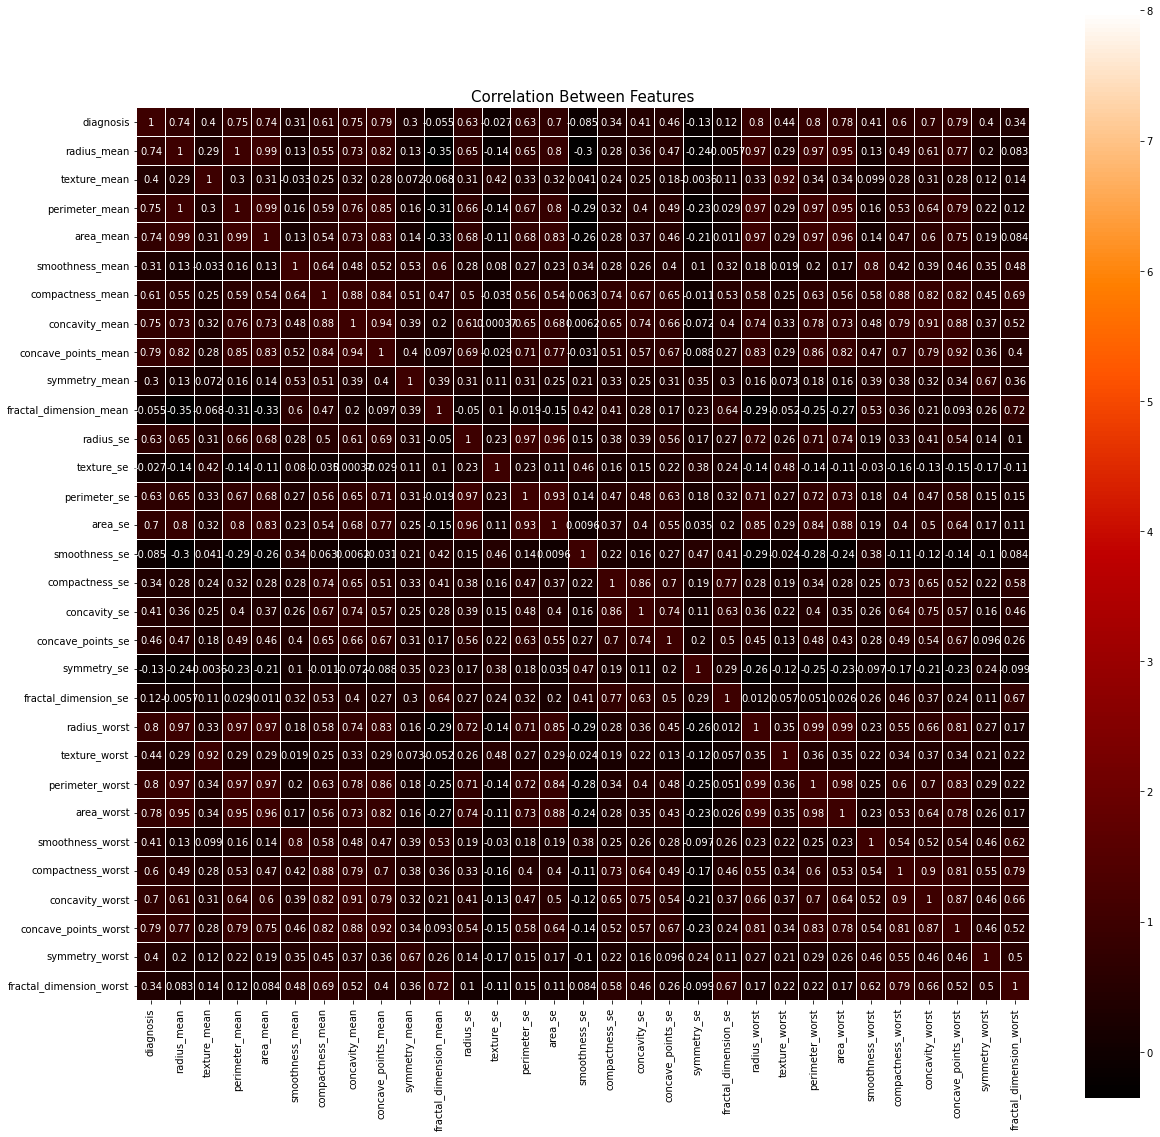

In [ ]:
#checking relationship between variable
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax = 8, linewidth=0.01, square = True,  annot=True, cmap= "gist_heat", linecolor="white")
plt.title("Correlation Between Features", size=15)
plt.show()

Observation: there is a strong positive correlation between diagnosis vairable and perimeter_worst, radius_worst, concave_point_worst etc.



## **7. Multivariate analysis**
We now perform multivariate analysis, which is a type of analysis that involves more variables. The main objective is to understand  the complex  relationships which cannot be handled by either univariate or bivariate analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


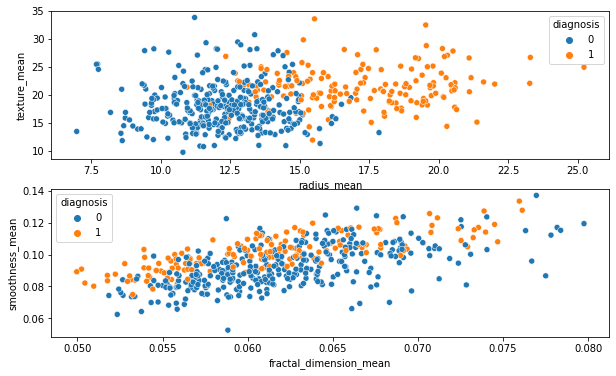

In [ ]:
#multivariate analysis visualization(few variables)
f, axes = plt.subplots(2, 1, figsize=[10, 6])
sns.scatterplot(cancerDf2['radius_mean'],cancerDf2['texture_mean'],hue=cancerDf2['diagnosis'], ax=axes[0])
sns.scatterplot(cancerDf2['fractal_dimension_mean'],cancerDf2['smoothness_mean'],hue=cancerDf2['diagnosis'], ax=axes[1])





Observation: 
1. Texcture and redius are higher in Beningn tumor. 
2. fractal diemnsion and smoothness is higher in beningn tumor.

To understand our dataset set more, we will perfom dimensionality reduction technique-Linear Discriminant Analysis(LDA)

In [ ]:
#step 1:  Separating our target label (diagnosis) from the other features
X= cancerDf2.drop(['diagnosis'],axis=1)
Y = cancerDf2['diagnosis']


In [ ]:
#confirming the feaures don't contain the target variable
X[1:10]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
3,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
4,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
5,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
6,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
7,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
8,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,0.5058,0.9849,3.564,54.16,0.005771,0.040610,0.02791,0.012820,0.02008,0.004144,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
9,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,0.4033,1.0780,2.903,36.58,0.009769,0.031260,0.05051,0.019920,0.02981,0.003002,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287


In [ ]:
#checking the unique values of the target variable
Y.unique()

array([1, 0])

In [ ]:
# Step 2: Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
#step3:  Create an instance of LDA and train the model
lda = LDA(solver='eigen', shrinkage = 'auto')

X_lda= lda.fit(X, Y)
lda_feat = X_lda.transform(X)

# Display the coeficients of the reducted columns
X_lda.coef_

array([[ 1.07941452e-01,  2.91079362e-02,  1.25040177e-02,
        -1.94646905e-03, -1.03913203e+01, -4.57752120e+01,
         3.23165281e+01,  4.20306239e+01,  6.31895941e+00,
        -7.79520307e+01,  7.96525705e+00, -1.03294115e+00,
        -1.59764191e-01,  7.50209456e-03,  2.50857483e+02,
        -4.31467136e+01, -2.15792862e+01,  1.70240192e+01,
         5.38044924e+01, -2.86318336e+02,  5.21535676e-01,
         2.19790390e-01,  5.61248647e-02, -3.06566737e-03,
         1.90863093e+01,  9.80354644e-01,  2.93588065e+00,
         2.27432417e+01,  1.05651827e+01,  8.28963919e+01]])

In [ ]:
#step4:  Since the coefficients are in an array, we needto create a dataframe so that we can extract the name of the columns
lda_df = pd.DataFrame(index=X.columns.values, data=X_lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
smoothness_se,250.857483
fractal_dimension_worst,82.896392
symmetry_se,53.804492
concave_points_mean,42.030624
concavity_mean,32.316528
concave_points_worst,22.743242
smoothness_worst,19.086309
concave_points_se,17.024019
symmetry_worst,10.565183
radius_se,7.965257



### **Recommendation**


From our analysis, it is safe to conclude that we can use a linear combination of the following 10 features to comfortably predict if a patient has breast cance.
1. smoothness_se
2. fractal_dimension_worst
3. symmetry_se
4. concave_points_mean
5. concavity_mean
6. concave_points_worst
7. smoothness_worst
8. concave_points_se
9. symmetry_worst
10. radius_se


